  Usually we think, Stock market movement majorly occurs during day but it is the other way around.So here we will analyse overnight returns for the amazon and apple stocks.

In [19]:
## importing important libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import yfinance as yf ## for accessing stock data
import datetime

In [20]:
## timing of investment
start_date = datetime.date(2000,1, 11)
end_date = datetime.datetime.today()


We access Apple and amazon data using yfinance library.

In [21]:
amazon = yf.download('AMZN', start= start_date, end= end_date)
apple = yf.download('AAPL', start= start_date, end= end_date)

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


In [22]:
## visualization of datasets
amazon.head()
#apple_data()  ##remove # to see apple  data

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2000-01-10,72.5625,72.6250,65.5625,69.1875,69.1875,14757900
2000-01-11,66.8750,70.0000,65.0000,66.7500,66.7500,10532700
2000-01-12,67.8750,68.0000,63.0000,63.5625,63.5625,10804500
2000-01-13,64.9375,67.1875,63.1250,65.9375,65.9375,10448100
2000-01-14,66.7500,68.6250,64.0000,64.2500,64.2500,6853600


Now we will calculate calculate the normalized return which is equal to ratio of adjusted closing prices of two consecutive days.

In [23]:
## the normalized return 
apple['norm_return'] = apple['Adj Close'] / apple.iloc[0]['Adj Close']
amazon['norm_return'] = amazon['Adj Close'] / amazon.iloc[0]['Adj Close']

In [24]:
## visualozing data
apple.norm_return
#amazon.norm_return   ##remove # to see amazon data

Date
2000-01-10      1.000000
2000-01-11      0.948849
2000-01-12      0.891944
2000-01-13      0.989769
2000-01-14      1.027493
                 ...    
2022-01-05    233.762522
2022-01-06    229.860245
2022-01-07    230.087430
2022-01-10    230.114164
2022-01-11    233.976350
Name: norm_return, Length: 5538, dtype: float64

Here we will allocate 50% of investment in apple and amazon(diversifying our portfolio)

In [25]:
allocation = 0.5
apple['allocation'] = apple['norm_return']* allocation
amazon['allocation']= amazon['norm_return']*allocation

In [26]:
## Suppose we invest 25000$ each in both the stocks.
Investment = 50000
## our daily_sum will be allocated size * investment in each stock
apple['daily_sum'] = apple['allocation']*(Investment)
amazon['daily_sum'] = amazon['allocation']*(Investment)



In [27]:
#cleaning the data
amazon.drop(['High','Low','Close', 'Volume'],axis=1,inplace=True)
apple.drop(['High','Low','Close', 'Volume'],axis=1,inplace=True)

In [28]:
#visualizing the numerical data
amazon.head()
apple.head()   ##remove # to see apple data

,Open,Adj Close,norm_return,allocation,daily_sum
Date,,,,,
2000-01-10,0.910714,0.748281,1.000000,0.500000,25000.000000
2000-01-11,0.856585,0.710005,0.948849,0.474425,23721.225263
2000-01-12,0.848214,0.667424,0.891944,0.445972,22298.598749
2000-01-13,0.843610,0.740625,0.989769,0.494885,24744.234299
2000-01-14,0.892857,0.768853,1.027493,0.513747,25687.330991


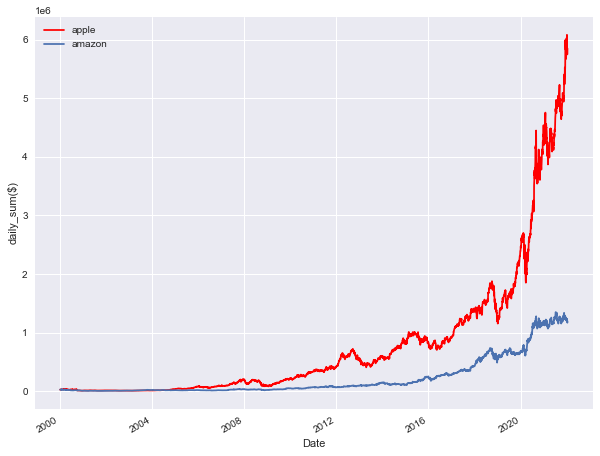

In [29]:
## now we will visualize plot data to see how our individual stocks performed.
plt.style.use('seaborn')
apple['daily_sum'].plot(figsize=(10,8), label = 'apple', color = 'r')
amazon['daily_sum'].plot(figsize=(10,8), label = 'amazon')
plt.legend()
plt.ylabel('daily_sum($)')
plt.show()


In [30]:
## visulazing data for our portfoilo(new dataframe), ( by adding daily_sum of both stocks)
daily_sum = [amazon['daily_sum'], apple['daily_sum']]
portfolio = pd.concat(daily_sum, axis=1)
portfolio.columns = ['amazon_daily_sum', 'apple_daily_sum']
portfolio['total_sum']  = amazon['daily_sum']+ apple['daily_sum']
portfolio.tail()

## here we can see amazon went down a bit but peroformed well thats why diversification of our portfolio is very important.

,amazon_daily_sum,apple_daily_sum,total_sum
Date,,,
2022-01-05,1.187765e+06,5.844063e+06,7.031828e+06
2022-01-06,1.179794e+06,5.746506e+06,6.926300e+06
2022-01-07,1.174735e+06,5.752186e+06,6.926921e+06
2022-01-10,1.167017e+06,5.752854e+06,6.919871e+06
2022-01-11,1.195028e+06,5.849409e+06,7.044437e+06


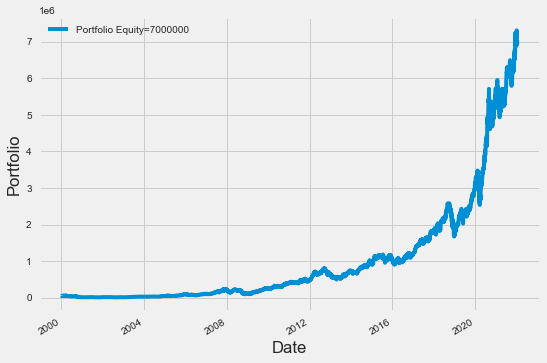

In [37]:
## now we will visualize plot data to see how our portfolio performed.
plt.style.use('fivethirtyeight')
portfolio['total_sum'].plot(figsize=(8,6), label = 'Portfolio Equity=7000000')
plt.legend()
plt.ylabel('Portfolio')
plt.show()

Now we will calculate sharpe ratio : ( average return - risk free rate) / volatility risk,
for that we need to know total daily return rate.


In [14]:
portfolio['total return'] = portfolio['total_sum'].pct_change(1)
portfolio.head()

,amazon_daily_sum,apple_daily_sum,total_sum,total return
Date,,,,
2020-01-10,25000.000000,25000.000000,50000.000000,NaN
2020-01-13,25108.063235,25534.108845,50642.172080,0.012843
2020-01-14,24817.858114,25189.312833,50007.170948,-0.012539
2020-01-15,24719.354512,25081.364324,49800.718836,-0.004128
2020-01-16,24930.700356,25395.546731,50326.247087,0.010553


In [17]:
## using sharpe ratio formula 
Sharpe_Ratio = portfolio['total return'].mean() / portfolio['total return'].std()
print(Sharpe_Ratio)
## this is daily Sharpe ratio , for annually sharpe ratio we need to multiply it with total trading days.

0.07978321245637708
